# Riot API json 데이터 파싱

<img src='data/photo/Riot.png'>

In [1]:
Riot_url = 'https://developer.riotgames.com/'

## 로그인

<img src='data/photo/login.png'>

In [2]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
import json, requests
from pandas.io.json import json_normalize
import pandas as pd

In [3]:
driver = webdriver.Chrome(r'C:\Users\유정수\Downloads\chromedriver_win32/chromedriver')

In [4]:
driver.get(Riot_url)

In [5]:
#로그인 버튼 누름
driver.find_element_by_xpath('//*[@id="site-navbar-collapse"]/ul[2]/li/a').click()

time.sleep(2)

#id와 password 입력
user_name = driver.find_element_by_xpath('//*[@id="rso-login-wrap"]/div[1]/div[1]/span/div/form/div[1]/input')
user_name.send_keys('youjeongsu')

password = driver.find_element_by_xpath('//*[@id="rso-login-wrap"]/div[1]/div[1]/span/div/form/div[2]/input')
password.send_keys('rhkdgus011!')

#나라 KR 로 설정 후 로그인 버튼 클릭
driver.find_element_by_xpath('//*[@id="region-selector"]/span').click()
driver.find_element_by_xpath('//*[@id="region-selector"]/span/select/option[5]').click()
driver.find_element_by_xpath('//*[@id="login-button"]').click()

## API 접근

### 이름 -> 고유 ID

In [6]:
name_url = 'https://developer.riotgames.com/api-methods/#summoner-v4/GET_getBySummonerName'

In [7]:
driver.get(name_url)

In [8]:
NAME='경희대대두'

In [9]:
#이름 입력
summonerName = driver.find_element_by_xpath('//*[@id="execute_inputs_summoner-v4_GET_getBySummonerName"]/form/div[1]/table/tbody/tr/td[2]/input')
summonerName.clear()
summonerName.send_keys(NAME)
driver.find_element_by_xpath('//*[@id="execute_inputs_summoner-v4_GET_getBySummonerName"]/form/div[2]/div[2]/label/input').click()
driver.find_element_by_xpath('//*[@id="execute_summoner-v4_GET_getBySummonerName"]').click()

time.sleep(2)

#REQUEST URL -> json 받아오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
REQUEST_URL = soup.select('div > div > div > a')[0]['href']
REQUEST_URL

'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/%EA%B2%BD%ED%9D%AC%EB%8C%80%EB%8C%80%EB%91%90?api_key=RGAPI-8fdef470-3181-4418-92ac-8ad5065c3e01'

In [10]:
r = requests.get(REQUEST_URL)
tmp = json_normalize(json.loads(r.text))
tmp

,status.message,status.status_code
0,Forbidden,403


In [88]:
tmp['name'] = tmp['name'].map(lambda x : x.replace(' ',''))

In [89]:
tmp

,accountId,id,name,profileIconId,puuid,revisionDate,summonerLevel
0,1jV-1dIvn6GdeC7VHLUWxPL_cMh7pkKCHOIsd9TpvkkhuOg,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE,원딜가는주형이,3810,8zS-xDkZsnP5DAcAfjC0l89E506-z6IypGa2sfoiTIEgaS...,1549347496000,77


In [60]:
user_table = pd.DataFrame()

In [90]:
user_table = user_table.drop_duplicates(['id'], keep=False)

user_table = user_table.append(tmp, ignore_index=True)

In [91]:
user_table

,accountId,id,name,profileIconId,puuid,revisionDate,summonerLevel
0,b0TWE_pUjR5aDRwLC8tSPEKaTANLWzv6muuc4JcmHRj2Xek,e4FssD2VtMnbcFjYM9rZqwmP7mcrDxfhBh0jPxzjPn9fTbE,산공,3024,0VweEAseewtIg5cITbNwCAHbK-MyeCwzc05iR8NuNTiyKU...,1549325124000,91
1,cSJ1MjLlUZ1wQy-5TWdwrbV4pM8O3e2wsNSsusWtleWk,C3-3SYIYtXxuOw9RuQ3WgjjPUU7Nhd8_YUwnr3CSgvgbYQ,감승가,642,RBJ8Ber7FK6Ac4it1ciUJKiSyKntW5i0anfuqHDa4OssjN...,1549324031000,74
2,kM1T3O9iA6eni2I_j39IbEm5fdVK_ko1xaY6QW2LKR42M9E,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E,무빙하나로살아옴,1666,kVFrI5xZ6zBQV3eFAqiwNIqVYhdCpUbI7cxlevAsYxW6X1...,1549329136000,221
3,7Atru3x4WwCZtiJLDETPd27NLtLZDYSn3BaklWtq3J1vO9U,V3YeRXPI2QqzGBKezV8kZHzCPvK6DwaCf-w46eKuwtlmD6E,룰루는정직해,642,v1LnNI7SlppJjvulvVyV2zWYvflXI5qcNsLmwbLrJomwsU...,1549309374000,174
4,1jV-1dIvn6GdeC7VHLUWxPL_cMh7pkKCHOIsd9TpvkkhuOg,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE,원딜가는주형이,3810,8zS-xDkZsnP5DAcAfjC0l89E506-z6IypGa2sfoiTIEgaS...,1549347496000,77


In [134]:
user_table.reset_index(inplace=True)
del user_table['index']

In [134]:
NAME='원딜가는주형이'

In [135]:
ID = list(user_table.loc[user_table.name==NAME, 'id'])[0]

------------------------------

### 고유 ID -> 리그 정보

In [94]:
league_url = 'https://developer.riotgames.com/api-methods/#league-v4/GET_getAllLeaguePositionsForSummoner'

In [125]:
driver.get(league_url)

In [136]:
#ID 입력
summonerID = driver.find_element_by_xpath('//*[@id="execute_inputs_league-v4_GET_getAllLeaguePositionsForSummoner"]/form/div[1]/table/tbody/tr/td[2]/input')

summonerID.clear()
summonerID.send_keys(ID)
driver.find_element_by_xpath('//*[@id="execute_inputs_league-v4_GET_getAllLeaguePositionsForSummoner"]/form/div[2]/div[2]/label/input').click()
driver.find_element_by_xpath('//*[@id="execute_league-v4_GET_getAllLeaguePositionsForSummoner"]').click()

time.sleep(2)

#REQUEST URL -> json 받아오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
REQUEST_URL = soup.select('div > div > div > a')[0]['href']

r = requests.get(REQUEST_URL)
json_normalize(json.loads(r.text))

,freshBlood,hotStreak,inactive,leagueId,leagueName,leaguePoints,losses,miniSeries.losses,miniSeries.progress,miniSeries.target,miniSeries.wins,position,queueType,rank,summonerId,summonerName,tier,veteran,wins
0,False,False,False,00000000-0000-0000-0000-000000000000,,100,8,0.0,NNN,2.0,0.0,TOP,RANKED_SOLO_5x5,IV,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE,원딜가는 주형이,PLATINUM,False,13
1,False,True,False,00000000-0000-0000-0000-000000000000,,79,8,NaN,NaN,NaN,NaN,JUNGLE,RANKED_SOLO_5x5,IV,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE,원딜가는 주형이,PLATINUM,False,13
2,True,False,False,00000000-0000-0000-0000-000000000000,,100,33,0.0,WNN,2.0,1.0,BOTTOM,RANKED_SOLO_5x5,IV,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE,원딜가는 주형이,PLATINUM,False,29


In [98]:
league_table = pd.DataFrame()

In [107]:
league_table = league_table.append(json_normalize(json.loads(r.text)))

In [137]:
league_table.drop(league_table[league_table.summonerId==ID].index, inplace=True)

tmp = json_normalize(json.loads(r.text))[json_normalize(json.loads(r.text)).queueType=='RANKED_SOLO_5x5']

tmp['summonerName'] = tmp['summonerName'].map(lambda x : x.replace(' ',''))

tmp['total'] = (tmp['wins'] + tmp['losses'].map(lambda x : int(x)))
tmp['rate'] = tmp['wins'] / tmp['losses']

tmp = tmp[['summonerName', 'position', 'tier', 'rank', 'leaguePoints', 'wins', 'losses', 'total', 'rate', 'summonerId']]
league_table = league_table.append(tmp, ignore_index=True)

In [121]:
tmp

,summonerName,position,tier,rank,leaguePoints,wins,losses,total,rate,summonerId
0,무빙하나로살아옴,TOP,PLATINUM,III,15,18,10,28,1.800000,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
1,무빙하나로살아옴,MIDDLE,PLATINUM,III,6,16,13,29,1.230769,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
2,무빙하나로살아옴,BOTTOM,PLATINUM,III,37,11,7,18,1.571429,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
3,무빙하나로살아옴,UTILITY,PLATINUM,IV,100,8,5,13,1.600000,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E


In [337]:
league_table.reset_index(inplace=True)
del league_table['index']

In [455]:
#예시
league_table

,summonerName,position,tier,rank,leaguePoints,wins,losses,summonerId
0,감승가,BOTTOM,GOLD,III,75,25,26,C3-3SYIYtXxuOw9RuQ3WgjjPUU7Nhd8_YUwnr3CSgvgbYQ
1,산 공,UTILITY,PLATINUM,IV,70,15,17,e4FssD2VtMnbcFjYM9rZqwmP7mcrDxfhBh0jPxzjPn9fTbE
2,룰루는 정직해,NONE,GOLD,II,37,6,5,V3YeRXPI2QqzGBKezV8kZHzCPvK6DwaCf-w46eKuwtlmD6E
3,룰루는 정직해,BOTTOM,PLATINUM,I,0,31,22,V3YeRXPI2QqzGBKezV8kZHzCPvK6DwaCf-w46eKuwtlmD6E


In [138]:
league_table

,summonerName,position,tier,rank,leaguePoints,wins,losses,total,rate,summonerId
0,산공,UTILITY,PLATINUM,IV,70,15,17,32,0.882353,e4FssD2VtMnbcFjYM9rZqwmP7mcrDxfhBh0jPxzjPn9fTbE
1,무빙하나로살아옴,TOP,PLATINUM,III,15,18,10,28,1.800000,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
2,무빙하나로살아옴,MIDDLE,PLATINUM,III,6,16,13,29,1.230769,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
3,무빙하나로살아옴,BOTTOM,PLATINUM,III,37,11,7,18,1.571429,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
4,무빙하나로살아옴,UTILITY,PLATINUM,IV,100,8,5,13,1.600000,J-aVyM0_MzbS2RygCWuxmlB3gvFNAUKwKBirclVAoY1CT5E
5,감승가,BOTTOM,GOLD,III,75,25,26,51,0.961538,C3-3SYIYtXxuOw9RuQ3WgjjPUU7Nhd8_YUwnr3CSgvgbYQ
6,룰루는정직해,BOTTOM,PLATINUM,I,0,31,22,53,1.409091,V3YeRXPI2QqzGBKezV8kZHzCPvK6DwaCf-w46eKuwtlmD6E
7,원딜가는주형이,TOP,PLATINUM,IV,100,13,8,21,1.625000,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE
8,원딜가는주형이,JUNGLE,PLATINUM,IV,79,13,8,21,1.625000,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE
9,원딜가는주형이,BOTTOM,PLATINUM,IV,100,29,33,62,0.878788,dNokKjZjcmb5n1Y469CBVoZ_n8AmwfAe5c5JS1Ia_42zoXE


In [163]:
league_table.to_csv('data/ch04.league_table_0206.csv', encoding='utf-8')

In [115]:
league_table = league_table[['summonerName', 'position', 'tier', 'rank', 'leaguePoints', 'wins', 'losses', 'total', 'rate', 'summonerId']]
league_table['total'] = (league_table['wins'] + league_table['losses'].map(lambda x : int(x)))
league_table['rate'] = league_table['wins'] / league_table['losses']

In [542]:
league_table.duplicated(['summonerId'], keep=False)

0    False
1    False
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

In [569]:
league_table.groupby('summonerName')['wins', 'losses', 'total'].sum()

,wins,losses,total
summonerName,,,
감승가,25,26,51
룰루는정직해,31,22,53
무빙하나로살아옴,53,35,88
산 공,15,17,32
원딜가는주형이,53,49,102


In [575]:
league_table.groupby(['summonerName', 'position'])['rate'].mean().unstack('position')

position,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
summonerName,,,,,
감승가,0.961538,NaN,NaN,NaN,NaN
룰루는정직해,1.409091,NaN,NaN,NaN,NaN
무빙하나로살아옴,1.571429,NaN,1.230769,1.8,1.600000
산 공,NaN,NaN,NaN,NaN,0.882353
원딜가는주형이,0.848485,1.625,NaN,1.5,NaN


------------------------------

## 소환사의 협곡에 나타내기

<img src='data/photo/map.png'>

In [13]:
import folium
import cv2
import numpy as np
from PIL import Image

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [260]:
NAME = '무빙하나로살아옴'

In [261]:
tmp = league_table.loc[league_table['summonerName']==NAME,['summonerName', 'position', 'total', 'rate']]
tmp

,summonerName,position,total,rate
1,무빙하나로살아옴,TOP,28,1.800000
2,무빙하나로살아옴,MIDDLE,29,1.230769
3,무빙하나로살아옴,BOTTOM,18,1.571429
4,무빙하나로살아옴,UTILITY,13,1.600000


In [212]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

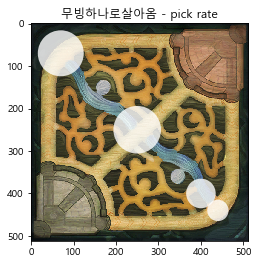

In [265]:
#numpy를 사용하기 위해 배열로 바꿈
img=np.asarray(Image.open('data/photo/map.png'))

#유저 정보에 있는 라인만 출력하도록 함
tmp = league_table.loc[league_table['summonerName']==NAME,['summonerName', 'position', 'total', 'rate']]

total_sum = tmp.loc[:, 'total'].sum(axis=0)

user_position = list(tmp['position'])
        # ['TOP', 'MIDDLE',          'BOTTOM', 'UTILITY']

position=['TOP', 'MIDDLE', 'JUNGLE', 'BOTTOM', 'UTILITY']
x=[70, 250, 270, 400, 440]
y=[70, 250, 390, 400, 440]

for i in range(5):
    if position[i] not in user_position:
        x[i]=0
        y[i]=0
        
while(0 in x):
    x.remove(0)
    y.remove(0)

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

#픽률 - 원그리기
i=0
for xx,yy in zip(x,y):
    size = (tmp.loc[tmp['position']==user_position[i],['total']] / total_sum * 170).values[0][0]
    circ = Circle((xx,yy), size, facecolor='white', alpha=0.8)
    ax.add_patch(circ)
    i+=1

# Show the image
plt.title(NAME+' - pick rate')
plt.show()
fig.savefig('data/photo/ch04/{}_pick_0206.png'.format(NAME), format='png')

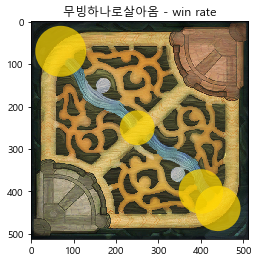

In [266]:
#numpy를 사용하기 위해 배열로 바꿈
img=np.asarray(Image.open('data/photo/map.png'))

#유저 정보에 있는 라인만 출력하도록 함
tmp = league_table.loc[league_table['summonerName']==NAME,['summonerName', 'position', 'total', 'rate']]

high=sorted(list(tmp['rate']))[-1]

user_position = list(tmp['position'])
        # ['TOP', 'MIDDLE',          'BOTTOM', 'UTILITY']

position=['TOP', 'MIDDLE', 'JUNGLE', 'BOTTOM', 'UTILITY']
x=[70, 250, 270, 400, 440]
y=[70, 250, 390, 400, 440]

for i in range(5):
    if position[i] not in user_position:
        x[i]=0
        y[i]=0
        
while(0 in x):
    x.remove(0)
    y.remove(0)

# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(img)

#승률 - 원그리기
i=0
for xx,yy in zip(x,y):
    size = (tmp.loc[tmp['position']==user_position[i],['rate']] / high * 60).values[0][0]
    circ = Circle((xx,yy), size, facecolor='gold', alpha=0.7)
    ax.add_patch(circ)
    i+=1

# Show the image
plt.title(NAME+' - win rate')
plt.show()
fig.savefig('data/photo/ch04/{}_win_0206.png'.format(NAME), format='png')

In [270]:
REQUEST_URL='https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/kM1T3O9iA6eni2I_j39IbEm5fdVK_ko1xaY6QW2LKR42M9E?api_key=RGAPI-8fdef470-3181-4418-92ac-8ad5065c3e01'

r = requests.get(REQUEST_URL)
json_normalize(json.loads(r.text)['matches'])

,champion,gameId,lane,platformId,queue,role,season,timestamp
0,99,3529076942,BOTTOM,KR,420,DUO_SUPPORT,11,1549355824292
1,99,3529027304,BOTTOM,KR,420,DUO_SUPPORT,11,1549353618070
2,99,3529015399,NONE,KR,420,DUO,11,1549353187071
3,81,3528987224,BOTTOM,KR,420,DUO_CARRY,11,1549351379515
4,7,3528918819,MID,KR,420,SOLO,11,1549349307499
5,157,3528869852,TOP,KR,420,SOLO,11,1549346989249
6,238,3528884926,NONE,KR,420,DUO_SUPPORT,11,1549345611704
7,238,3528880795,NONE,KR,420,DUO,11,1549344349152
8,157,3528835272,MID,KR,420,SOLO,11,1549342513572
9,157,3528769706,TOP,KR,420,SOLO,11,1549340412055


In [271]:
REQUEST_URL='https://kr.api.riotgames.com/lol/match/v4/matches/3529076942?api_key=RGAPI-8fdef470-3181-4418-92ac-8ad5065c3e01'

r = requests.get(REQUEST_URL)
json.loads(r.text)

{'gameId': 3529076942,
 'platformId': 'KR',
 'gameCreation': 1549355824292,
 'gameDuration': 2071,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 11,
 'gameVersion': '9.2.261.2172',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Win',
   'firstBlood': False,
   'firstTower': False,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 10,
   'inhibitorKills': 2,
   'baronKills': 1,
   'dragonKills': 2,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 517, 'pickTurn': 1},
    {'championId': 17, 'pickTurn': 2},
    {'championId': 3, 'pickTurn': 3},
    {'championId': 7, 'pickTurn': 4},
    {'championId': 121, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Fail',
   'firstBlood': True,
   'firstTower': True,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills': 3